In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
file_path = "/kaggle/input/adult-income-dataset/adult.csv"
data = pd.read_csv(file_path)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, 

data.shape

(48842, 15)

In [4]:
#Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Fetch Random Sample From the Dataset (50%)
smaple_data = data.sample(frac=0.5)
print(smaple_data)

       age     workclass  fnlwgt     education  educational-num  \
20158   36       Private  175759       HS-grad                9   
32243   21       Private  409230       HS-grad                9   
23054   54       Private  249860          11th                7   
36317   61  Self-emp-inc  102191       Masters               14   
1059    31       Private   25610     Preschool                1   
...    ...           ...     ...           ...              ...   
23747   23       Private  352606       HS-grad                9   
10059   19       Private  238144  Some-college               10   
23007   28       Private   32291     Bachelors               13   
19072   55       Private   92215       HS-grad                9   
531     24     Local-gov  238384     Bachelors               13   

      marital-status         occupation   relationship                race  \
20158       Divorced    Exec-managerial      Unmarried               White   
32243  Never-married       Craft-repair

In [6]:
null_values = data.isnull().sum()
print(null_values)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [7]:
#.Perform Data Cleaning [ Replace '?' with NaN ]
data.replace('?', np.nan, inplace=True)

In [8]:
#Drop all The Missing Values
duplicates = data.duplicated().any()
print("Duplicates",duplicates )
data.dropna(inplace=True)



Duplicates True


In [9]:
#Check For Duplicate Data and Drop Them
data.drop_duplicates(inplace=True)

In [10]:
#  Get Overall Statistics About The Dataframe
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#Drop The Columns education-num, capital-gain, and capital-loss

#data.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1, inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


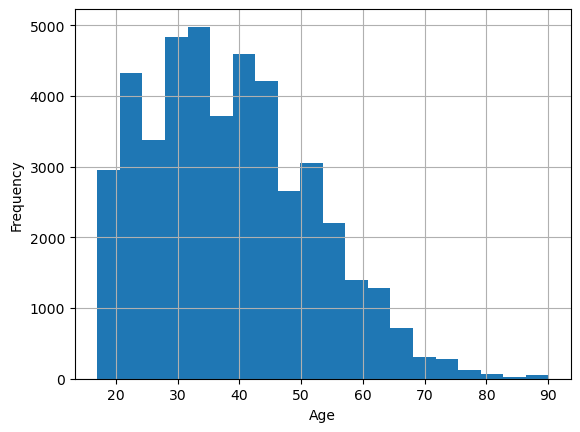

In [12]:
#What Is The Distribution of Age Column?

import matplotlib.pyplot as plt


age_dist = data["age"].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Find Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method
age_count = data["age"].between(17,48).sum()
print("Total number of persons having age between 17 to 48 (inclusive):", age_count)


Total number of persons having age between 17 to 48 (inclusive): 34858


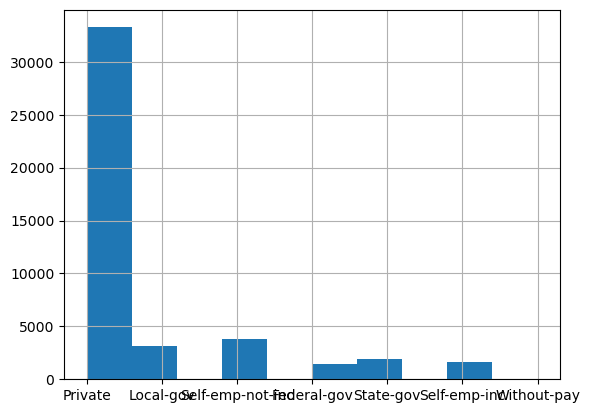

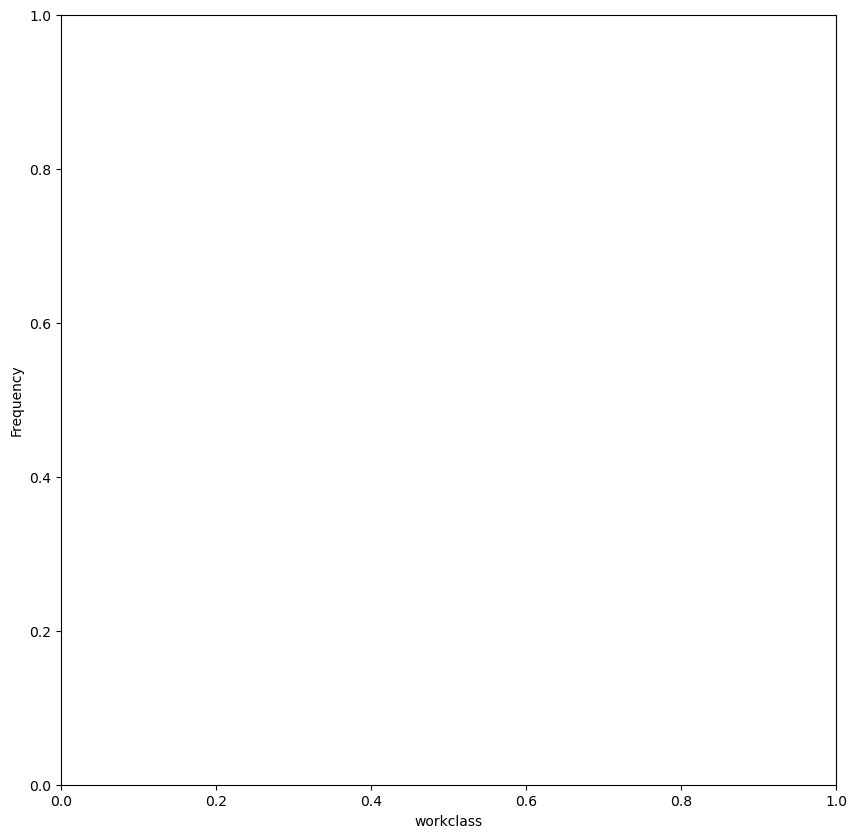

In [14]:
# What is The Distribution of Workclass Column?
workclass_dist = data["workclass"].hist()
plt.figure(figsize=(10,10))
plt.xlabel('workclass')
plt.ylabel('Frequency')
plt.show()

In [15]:
#How Many Persons Having Bachelors and Masters Degree?

degree_counts = data['education'].value_counts()
bachelor = degree_counts["Bachelors"]
masters_count = degree_counts['Masters']
print("Number of persons with Bachelor's degree:", bachelor)
print("Number of persons with Master's degree:", masters_count)


Number of persons with Bachelor's degree: 7559
Number of persons with Master's degree: 2513


In [16]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



X = data[["hours-per-week", "age"]]
y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, penalty='l2', C=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.7530713890426121


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])
data['education'] = le.fit_transform(data['education'])
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['gender'] = le.fit_transform(data['gender'])
data['native-country'] = le.fit_transform(data['native-country'])
data['income'] = le.fit_transform(data['income'])



X = data.drop(['income'], axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, penalty='l2', C=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

print(y_pred)

Accuracy: 0.7953514111787493
[0 0 0 ... 0 0 0]


In [20]:
# Bivariate Analsis

pd.crosstab(data['age'], data['income'])

income,0,1
age,,
17,492,0
18,694,0
19,855,2
20,914,1
21,925,6
...,...,...
86,1,0
87,1,0
88,4,1


In [21]:
data.groupby('age')['income'].mean()

age
17    0.000000
18    0.000000
19    0.002334
20    0.001093
21    0.006445
        ...   
86    0.000000
87    0.000000
88    0.200000
89    0.000000
90    0.266667
Name: income, Length: 74, dtype: float64

In [22]:
# Replace Salary Values With 0 and 1
data["income"] = data["income"].replace({"<=50K":0, ">50K":1})
data["income"]

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45175, dtype: int64

In [23]:
#Which Workclass Getting The Highest Salary?
data.columns
data.head()
data.groupby("workclass")["income"].mean().sort_values(ascending=False)

workclass
3    0.554407
0    0.390469
1    0.295161
4    0.279051
5    0.267215
2    0.217816
6    0.095238
Name: income, dtype: float64

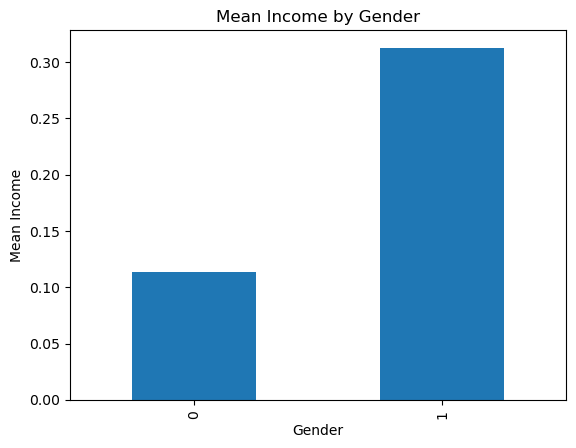

In [24]:
#How Has Better Chance To Get Salary greater than 50K Male or Female?
income_by_gender  = data.groupby("gender")["income"].mean()

income_by_gender.plot.bar()

# set the title and axis labels
plt.title("Mean Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Income")

# show the plot
plt.show()

In [25]:
#Covert workclass Columns Datatype To Category Datatype
data["workclass"] = data["workclass"].astype("category")
data["workclass"]

0        2
1        2
2        1
3        2
5        2
        ..
48837    2
48838    2
48839    2
48840    2
48841    3
Name: workclass, Length: 45175, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]